In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import csv
import requests
import os
from dotenv import load_dotenv
from babel.numbers import format_currency # to format currency as USD 

In [2]:
load_dotenv()

API_KEY = '757164dfbc150b94b79d96927101fac7'
BASE_PATH = 'https://api.themoviedb.org/3/movie'

payload = {
   'api_key': API_KEY,
   'language': 'en-US',
   'external_source': 'imdb_id'
}


# paginate through 500 pages
data=[]
page = 0
while page < 500:
    page += 1
    url = f'https://api.themoviedb.org/3/discover/movie?api_key={API_KEY}&sort_by=revenue.desc&offset=20&page={page}' #primary_release_year=2022&
    r = requests.get(url, params=payload)
    responded = r.json()
    print(responded)
    resp = responded['results']  
    data.extend(resp)
    #time.sleep(2)

{'page': 1, 'results': [{'adult': False, 'backdrop_path': '/25Q9AKPfYqfNmNy57wjFMkpOBcG.jpg', 'genre_ids': [28, 53, 35, 18], 'id': 1072246, 'original_language': 'es', 'original_title': 'Watch Your Six', 'overview': 'A simple misunderstanding leads to a gripping action sequence with a heartwarming resolution.', 'popularity': 1.4, 'poster_path': '/5zWS3gFNeoGuUSYLShSRDxZBiok.jpg', 'release_date': '', 'title': 'Watch Your Six', 'video': False, 'vote_average': 10, 'vote_count': 1}, {'adult': False, 'backdrop_path': '/8I37NtDffNV7AZlDa7uDvvqhovU.jpg', 'genre_ids': [28, 12, 14, 878], 'id': 19995, 'original_language': 'en', 'original_title': 'Avatar', 'overview': 'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.', 'popularity': 1273.863, 'poster_path': '/jRXYjXNq0Cs2TcJjLkki24MLp7u.jpg', 'release_date': '2009-12-15', 'title': 'Avatar', 'video': False, 'vote_average': 

In [3]:
"""
# define column names for our new dataframe
columns = ['name','release_date', 'genre_ids','adult', 'video','revenue']
df = pd.DataFrame(columns=columns)

# for each of the highest revenue films make an api call for that specific movie to return the budget and revenue
for film in highest_revenue_films:
    # print(film['title'])
    film_revenue = requests.get('https://api.themoviedb.org/3/movie/'+ str(film['id']) +'?api_key='+ API_KEY+'&language=en-US')
    film_revenue = film_revenue.json()
    #print(format_currency(film_revenue['revenue'], 'USD', locale='en_US'))
    df.loc[len(df)]=[film['title'],film['release_date'],film['genre_ids'],film['adult'], film['video'], film_revenue['revenue']] # store title and revenue in our dataframe 

# save to csv
df.to_csv('TMDB.csv', encoding='utf-8', index=False)

"""

"\n# define column names for our new dataframe\ncolumns = ['name','release_date', 'genre_ids','adult', 'video','revenue']\ndf = pd.DataFrame(columns=columns)\n\n# for each of the highest revenue films make an api call for that specific movie to return the budget and revenue\nfor film in highest_revenue_films:\n    # print(film['title'])\n    film_revenue = requests.get('https://api.themoviedb.org/3/movie/'+ str(film['id']) +'?api_key='+ API_KEY+'&language=en-US')\n    film_revenue = film_revenue.json()\n    #print(format_currency(film_revenue['revenue'], 'USD', locale='en_US'))\n    df.loc[len(df)]=[film['title'],film['release_date'],film['genre_ids'],film['adult'], film['video'], film_revenue['revenue']] # store title and revenue in our dataframe \n\n# save to csv\ndf.to_csv('TMDB.csv', encoding='utf-8', index=False)\n\n"

In [4]:
len(data)

10000

In [5]:
df = pd.DataFrame(data)

# Data Wrangling

## General Properties

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adult              10000 non-null  bool   
 1   backdrop_path      9685 non-null   object 
 2   genre_ids          10000 non-null  object 
 3   id                 10000 non-null  int64  
 4   original_language  10000 non-null  object 
 5   original_title     10000 non-null  object 
 6   overview           10000 non-null  object 
 7   popularity         10000 non-null  float64
 8   poster_path        9955 non-null   object 
 9   release_date       9997 non-null   object 
 10  title              10000 non-null  object 
 11  video              10000 non-null  bool   
 12  vote_average       10000 non-null  float64
 13  vote_count         10000 non-null  int64  
dtypes: bool(2), float64(2), int64(2), object(8)
memory usage: 957.2+ KB


## Data Cleaning
Delete: 
    1. unused columns
    
    2. duplicate rows 
    
    3. trim the release date into showing year only
    
    4. remove movie released before 1992
    
Fill in the null value

In [7]:
df2 = df.drop(['backdrop_path','original_title','overview','poster_path'],axis=1)

In [8]:
sum(df2.astype(str).duplicated())
# df2.loc[df2.astype(str).drop_duplicates(inplace=True)]

0

In [9]:
df2.shape

(10000, 10)

In [10]:
df2['release_date'] = df2['release_date'].apply(lambda x: x).replace('', np.nan)

In [11]:
df2.isna().sum()

adult                 0
genre_ids             0
id                    0
original_language     0
popularity            0
release_date         44
title                 0
video                 0
vote_average          0
vote_count            0
dtype: int64

In [12]:
df2['release_date'].fillna("3000", inplace=True)

In [13]:
df2['release_date'] = df2['release_date'].str[:4]

In [14]:
df2['release_date'] = df2['release_date'].astype(int)
df2 = df2[df2['release_date']>=1992]

In [15]:
df2.head(2)

adult          genre_ids       id original_language  popularity  \
0  False   [28, 53, 35, 18]  1072246                es       1.400   
1  False  [28, 12, 14, 878]    19995                en    1273.863   

   release_date           title  video  vote_average  vote_count  
0          3000  Watch Your Six  False          10.0           1  
1          2009          Avatar  False           7.6       27852

In [16]:
df2.tail(2)

adult               genre_ids      id original_language  popularity  \
9997  False         [35, 12, 10751]  140532                nl       0.600   
9999  False  [10752, 10751, 18, 36]  277190                nl       2.682   

      release_date                    title  video  vote_average  vote_count  
9997          2012  Plop Becomes Gnome King  False           1.0           1  
9999          2014           Secrets of War  False           6.8          60

In [17]:
print("Afetr Removing Unused Data : ",df2.shape)

Afetr Removing Unused Data :  (7763, 10)


# Exploratory Data Analysis

## Observation From The Dataset

In [18]:
df2.describe()

id   popularity  release_date  vote_average    vote_count
count  7.763000e+03  7763.000000   7763.000000   7763.000000   7763.000000
mean   1.757857e+05    22.529717   2014.365838      6.333724   1642.090815
std    2.212442e+05   125.075729     74.846140      1.178946   3035.865263
min    5.000000e+00     0.600000   1992.000000      0.000000      0.000000
25%    1.112000e+04     6.541500   2003.000000      5.900000    104.000000
50%    5.072200e+04    11.251000   2010.000000      6.500000    498.000000
75%    3.248505e+05    20.424500   2015.000000      7.000000   1708.000000
max    1.072246e+06  9062.029000   3000.000000     10.000000  33000.000000

## Exploratory Data Analysis

### Research Question 1 : Which year has the highest release of movies from 1992 to now?

In [19]:
data = df2[df2['release_date']!=3000]
data = data.groupby('release_date').count()['id']

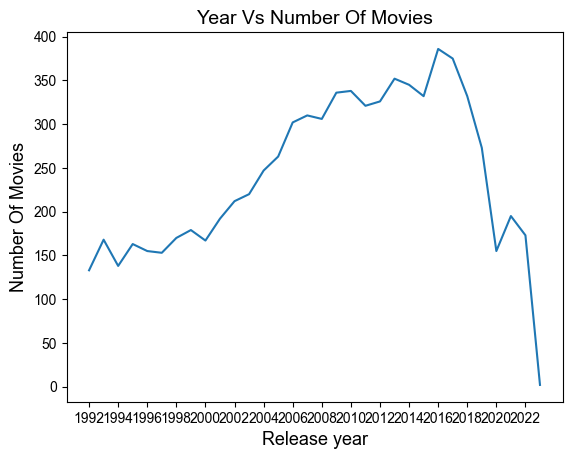

In [20]:
data.plot(xticks = np.arange(1992,2023,2))
#set the figure size and labels
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Year Vs Number Of Movies",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)
#set the style sheet
sns.set_style("whitegrid")

### Research Question 2 : Which movie get the highest or lowest votes (Ratings)?

In [21]:
def find_minmax(x): # x is the column value
    min_index = df2[x].idxmin()
    max_index = df2[x].idxmax()
    min_value = pd.DataFrame(df2.loc[min_index])
    max_value = pd.DataFrame(df2.loc[max_index])
    print(f"Highest: {max_value.iloc[6][0]}\nLowest: {min_value.iloc[6][49]}")
    col = ['Highest','Lowest']
    res = pd.concat([max_value,min_value],axis = 1)
    res.columns = col
    return res

In [22]:
#call the find_minmax function.
find_minmax('vote_average')

Highest: Watch Your Six
Lowest: The Places We Worship


Highest                 Lowest
adult                         False                  False
genre_ids          [28, 53, 35, 18]                     []
id                          1072246                 994121
original_language                es                     en
popularity                      1.4                    0.6
release_date                   3000                   2021
title                Watch Your Six  The Places We Worship
video                         False                  False
vote_average                   10.0                    0.0
vote_count                        1                      0

### Research Question 3 : Top 30 highets rated movies?

/var/folders/3f/0c48rx816935875jnxcqj5sr0000gn/T/ipykernel_8378/3823376058.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  x = list(info["title"][:30])
/var/folders/3f/0c48rx816935875jnxcqj5sr0000gn/T/ipykernel_8378/3823376058.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y = list(info['vote_average'][:30])


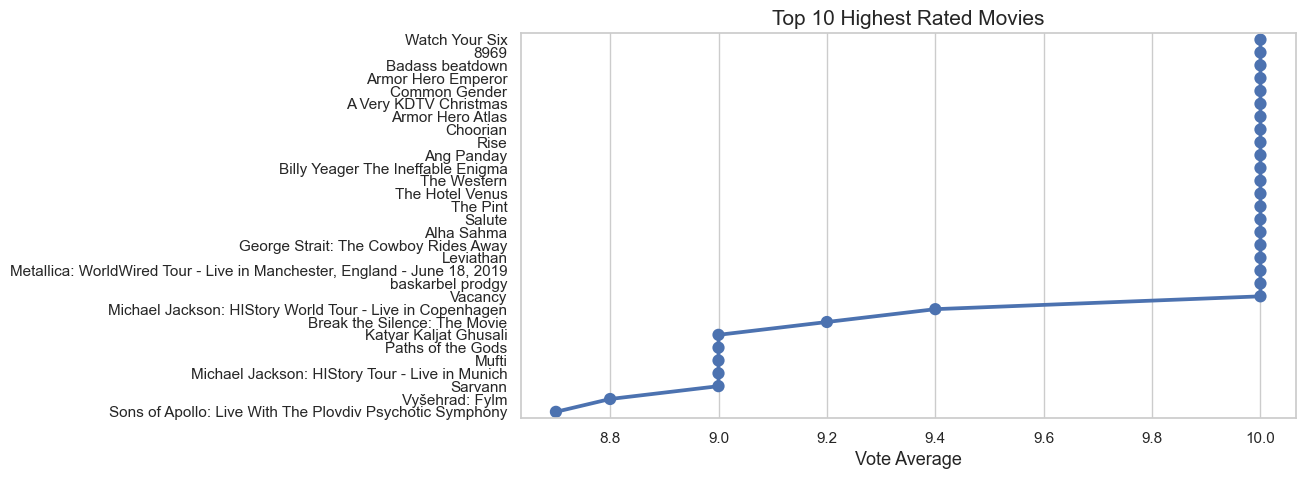

In [23]:
info = pd.DataFrame(df2['vote_average'].sort_values(ascending = False))
info['title'] = df2['title']
x = list(info["title"][:30])
y = list(info['vote_average'][:30])

#make the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Highest Rated Movies",fontsize = 15)
ax.set_xlabel("Vote Average",fontsize = 13)
#setup the stylesheet
sns.set_style("darkgrid")

### Research Question 3: Which Genre Has The Highest Release Of Movies?

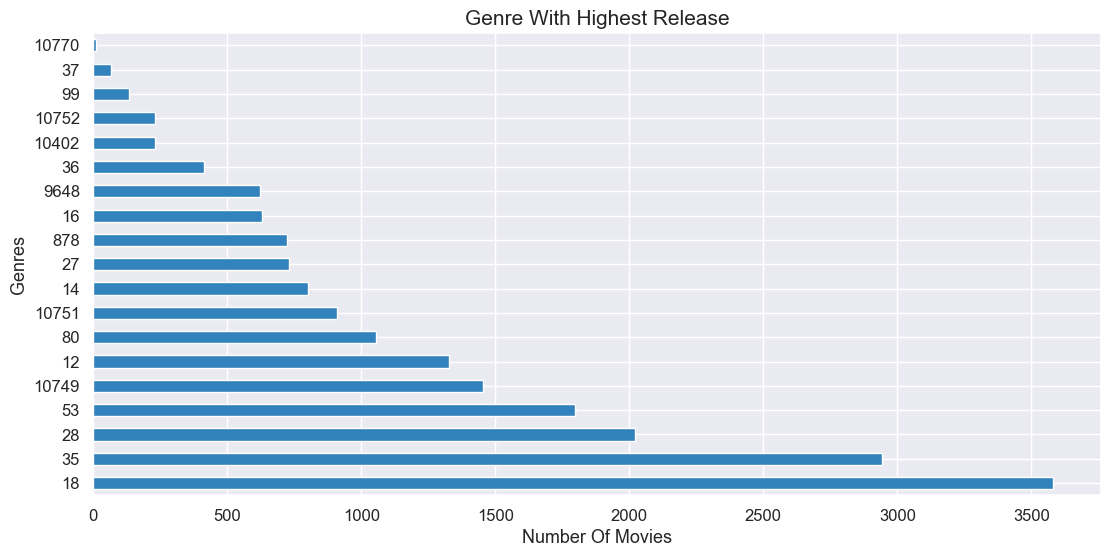

In [24]:
def count_genre():
    data = df2.explode('genre_ids')
    info = data['genre_ids'].value_counts(ascending=False)
    return info

#call the function for counting the movies of each genre.
total_genre_movies = count_genre()
#plot a bar plot using plot function for 'genre vs number of movies'.
total_genre_movies.plot(kind= 'barh',figsize = (13,6),fontsize=12,colormap='tab20c')

#setup the title and the labels of the plot.
plt.title("Genre With Highest Release",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Genres",fontsize= 13)
sns.set_style("whitegrid")

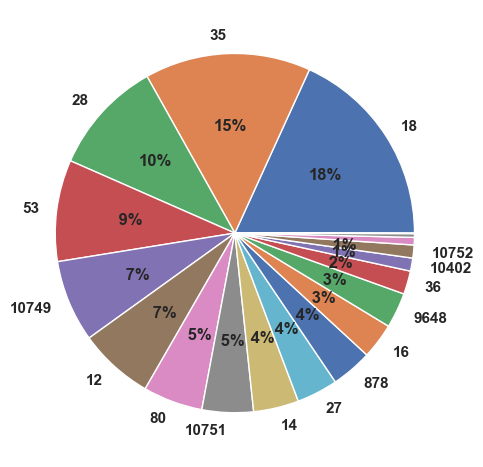

In [25]:
i = 0
genre_count = []
for genre in total_genre_movies.index: # total_genre_movies.index : genre 
    genre_count.append([genre, total_genre_movies.values[i]])
    i = i+1
    
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(5, 5))
genre_count.sort(key = lambda x:x[1], reverse = True)
labels, sizes = zip(*genre_count)
labels_selected = [n if v > sum(sizes) * 0.01 else '' for n, v in genre_count]
ax.pie(sizes, labels=labels_selected,
       autopct = lambda x:'{:2.0f}%'.format(x) if x > 1 else '',
       shadow=False, startangle=0)
ax.axis('equal')
plt.tight_layout()

### Research Question 4: Which genres are most popular from year to year?
1. Find the top 5 popular genres
2. Draw the bar chart and line chart

In [26]:
data = df2.explode('genre_ids')

#make the numpy array of year and popularity which contain all the rows of release_year and popularity column. 
year = np.sort(np.array(df2['release_date']))
popularity = np.array(df2['popularity'])

#make a null dataframe which indexs are genres and columns are years.
popularity_df = pd.DataFrame(index = data['genre_ids'].unique(), columns = np.sort(df2['release_date'].unique()))
#change all the values of the dataframe from NAN to zero.
popularity_df = popularity_df.fillna(value = 0.0)

popularity_df = pd.DataFrame(data.groupby(['genre_ids', 'release_date'], as_index=False)['popularity'].sum()).astype(int)

popularity_df = popularity_df.pivot(index='genre_ids', columns='release_date', values='popularity')
popularity_df.index.name = None
popularity_df


release_date   1992    1993   1994   1995   1996   1997    1998    1999  \
12            308.0   283.0  305.0  535.0  373.0  587.0   529.0   448.0   
14            254.0   311.0  298.0  324.0  278.0  321.0   252.0   426.0   
16            204.0   260.0  282.0  336.0  101.0  200.0   282.0   306.0   
18            700.0  1015.0  902.0  886.0  914.0  909.0  1071.0  1313.0   
27            242.0   112.0  113.0  200.0  233.0  227.0   261.0   306.0   
28            464.0   739.0  643.0  854.0  528.0  732.0   638.0   527.0   
35            574.0   817.0  855.0  783.0  773.0  687.0  1069.0  1119.0   
36             62.0   149.0   28.0   76.0  140.0   67.0   109.0    69.0   
37             40.0    37.0   62.0   44.0    2.0    NaN     9.0    32.0   
53            436.0   420.0  378.0  702.0  580.0  772.0   593.0   598.0   
80            273.0   320.0  510.0  547.0  344.0  348.0   383.0   453.0   
99              NaN     NaN   14.0    2.0    7.0    NaN     8.0     2.0   
878           234.0   337.0  236.0  449.0  265.0  502.0   283.0   477.0   
9648          104.0   135.0   68.0  158.0  184.0  341.0   197.0   420.0   
10402          87.0    61.0   27.0   10.0   28.0   46.0    98.0    24.0   
10749         350.0   411.0  424.0  457.0  393.0  420.0   505.0   470.0   
10751         270.0   465.0  382.0  427.0  288.0  336.0   433.0   369.0   
10752          24.0    92.0   23.0   58.0   30.0   36.0    84.0    43.0   
10770           NaN     NaN    NaN    NaN    6.0    NaN     NaN     NaN   

release_date    2000    2001  ...    2015    2016    2017    2018    2019  \
12             548.0   901.0  ...  1942.0  2147.0  1909.0  2159.0  1968.0   
14             377.0   752.0  ...   817.0  1040.0  1292.0   927.0  1307.0   
16             288.0   483.0  ...   876.0  1042.0   860.0   846.0  1024.0   
18            1042.0  1048.0  ...  2309.0  2862.0  2957.0  2332.0  2061.0   
27             224.0   245.0  ...   413.0   854.0   771.0   759.0   819.0   
28             583.0   959.0  ...  2235.0  2498.0  2494.0  2882.0  2054.0   
35            1087.0  1404.0  ...  1911.0  2002.0  1906.0  1418.0  1885.0   
36              72.0   168.0  ...   319.0   648.0   363.0   358.0   392.0   
37              17.0    20.0  ...    94.0    63.0    20.0    13.0     9.0   
53             665.0   811.0  ...  1470.0  1536.0  1575.0  1701.0  1394.0   
80             413.0   501.0  ...   769.0   512.0   994.0   905.0   703.0   
99              14.0    11.0  ...    43.0    35.0    38.0    73.0    12.0   
878            180.0   381.0  ...  1249.0   835.0  1247.0  1454.0   753.0   
9648           202.0   317.0  ...   374.0   534.0   899.0   563.0   321.0   
10402           96.0    56.0  ...   213.0   269.0   194.0   187.0   104.0   
10749          401.0   815.0  ...   734.0   851.0   679.0   636.0   724.0   
10751          427.0   574.0  ...   780.0   984.0   929.0   651.0  1147.0   
10752           78.0   197.0  ...   116.0   394.0   262.0   166.0   218.0   
10770            NaN     NaN  ...     NaN     NaN     1.0     NaN     NaN   

release_date    2020    2021     2022  2023  3000  
12            1331.0  4117.0  16446.0   NaN   NaN  
14            1340.0  2464.0  13955.0   NaN   4.0  
16             962.0  2438.0  11805.0   NaN   NaN  
18            1231.0  1643.0   7099.0  34.0   4.0  
27             609.0  1384.0   8091.0   NaN   1.0  
28            1562.0  3978.0  23889.0   0.0   1.0  
35             990.0  2394.0  21440.0   NaN   2.0  
36             145.0   353.0   3863.0   NaN   0.0  
37              32.0    77.0    102.0   NaN   NaN  
53             986.0  1866.0   8296.0   0.0   3.0  
80             360.0   772.0   4836.0   NaN   0.0  
99              13.0    18.0     46.0   NaN   NaN  
878            301.0  2281.0  10543.0   NaN   NaN  
9648           276.0   795.0   3704.0   NaN   0.0  
10402           73.0   156.0    670.0   NaN   NaN  
10749          361.0   397.0   1024.0   NaN   0.0  
10751          880.0  1745.0  12713.0   NaN   NaN  
10752           96.0  

In [27]:
# data standardization
def calculate_std(x):
    return (x-x.mean())/x.std()

popular_genre = calculate_std(popularity_df)
top5 = pd.DataFrame(calculate_std(popularity_df).mean(axis=1).sort_values(ascending=False)).head(5) 

In [28]:
top = popularity_df.loc[[18,35,28,12,53]]
top

release_date   1992    1993   1994   1995   1996   1997    1998    1999  \
18            700.0  1015.0  902.0  886.0  914.0  909.0  1071.0  1313.0   
35            574.0   817.0  855.0  783.0  773.0  687.0  1069.0  1119.0   
28            464.0   739.0  643.0  854.0  528.0  732.0   638.0   527.0   
12            308.0   283.0  305.0  535.0  373.0  587.0   529.0   448.0   
53            436.0   420.0  378.0  702.0  580.0  772.0   593.0   598.0   

release_date    2000    2001  ...    2015    2016    2017    2018    2019  \
18            1042.0  1048.0  ...  2309.0  2862.0  2957.0  2332.0  2061.0   
35            1087.0  1404.0  ...  1911.0  2002.0  1906.0  1418.0  1885.0   
28             583.0   959.0  ...  2235.0  2498.0  2494.0  2882.0  2054.0   
12             548.0   901.0  ...  1942.0  2147.0  1909.0  2159.0  1968.0   
53             665.0   811.0  ...  1470.0  1536.0  1575.0  1701.0  1394.0   

release_date    2020    2021     2022  2023  3000  
18            1231.0  1643.0   7099.0  34.0   4.0  
35             990.0  2394.0  21440.0   NaN   2.0  
28            1562.0  3978.0  23889.0   0.0   1.0  
12            1331.0  4117.0  16446.0   NaN   NaN  
53             986.0  1866.0   8296.0   0.0   3.0  

[5 rows x 33 columns]

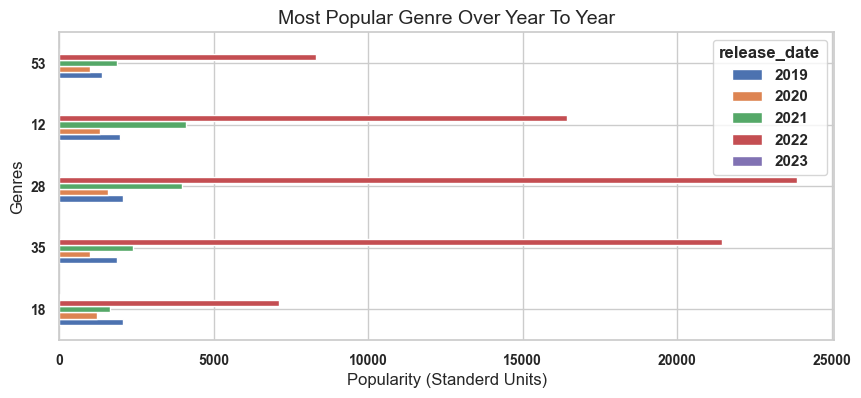

In [29]:
#plot the barh plot of the standardised data.
top.iloc[:,27:-1].plot(kind='barh',figsize = (10,4),fontsize=10)

#setup the title and labels of the plot.
plt.title("Most Popular Genre Over Year To Year",fontsize=14)
plt.xlabel("Popularity (Standerd Units)",fontsize=12)
plt.ylabel("Genres",fontsize = 12)
sns.set_style("whitegrid")

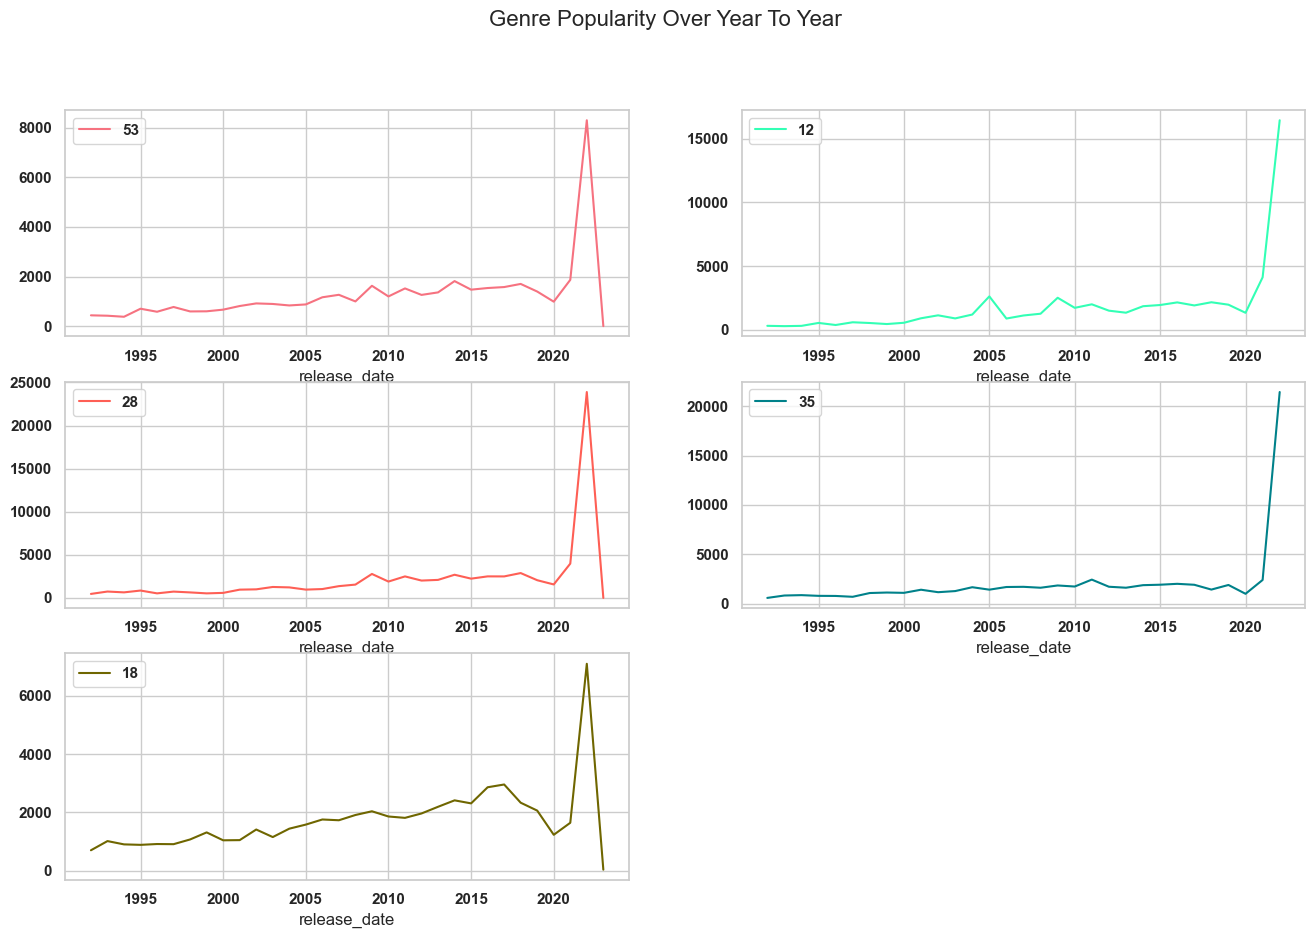

In [30]:
#How the popularity of the genre differ year by year.
sns.set_style("whitegrid")
#make a subplot of size 3,3.
fig, ax = plt.subplots(3,2,figsize = (16,10))

#set the title of the subplot.
fig.suptitle('Genre Popularity Over Year To Year',fontsize = 16)

top = top.iloc[:, :-1] # remove the year 3000
top.loc[53].plot(label = "53",color = '#f67280',ax = ax[0][0],legend=True)
top.loc[12].plot(label = "12",color='#33FFB5',ax = ax[0][1],legend=True)
top.loc[28].plot(label = "28",color='#fe5f55',ax = ax[1][0],legend=True)
top.loc[35].plot(label = "35",color='#00818a',ax = ax[1][1],legend=True)
top.loc[18].plot(label = "18",color='#6f6600',ax = ax[2][0],legend=True)

# remove the unused subplot
fig.delaxes(ax[2][1])

### Research Question 5: What Kind Of Properties Are Associated With Movies With Popularity?
1. Find the regression line
2. Correlation Map

In [31]:
# Descriptive statsdf2
# make a new dataframe ordered by popularity
info = pd.DataFrame(df2['popularity'].sort_values(ascending=False))
data_set = df2.columns
for i in data_set:
    info[i] = df2[i]
info.head(5)

popularity  adult                    genre_ids      id  \
643     9062.029  False  [16, 28, 12, 35, 10751, 14]  315162   
1848    2679.327  False                [878, 27, 35]  536554   
6       2619.368  False                [878, 12, 28]   76600   
2230    1716.730  False             [28, 35, 80, 53]  899112   
128     1612.801  False              [12, 10751, 14]     411   

     original_language  release_date  \
643                 en          2022   
1848                en          2022   
6                   en          2022   
2230                en          2022   
128                 en          2005   

                                                  title  video  vote_average  \
643                        Puss in Boots: The Last Wish  False           8.6   
1848                                              M3GAN  False           7.0   
6                              Avatar: The Way of Water  False           7.7   
2230                                      Violent Night  False           7.7   
128   The Chronicles of Narnia: The Lion, the Witch ...  False           7.1   

      vote_count  
643         2077  
1848         321  
6           4361  
2230         952  
128         9183

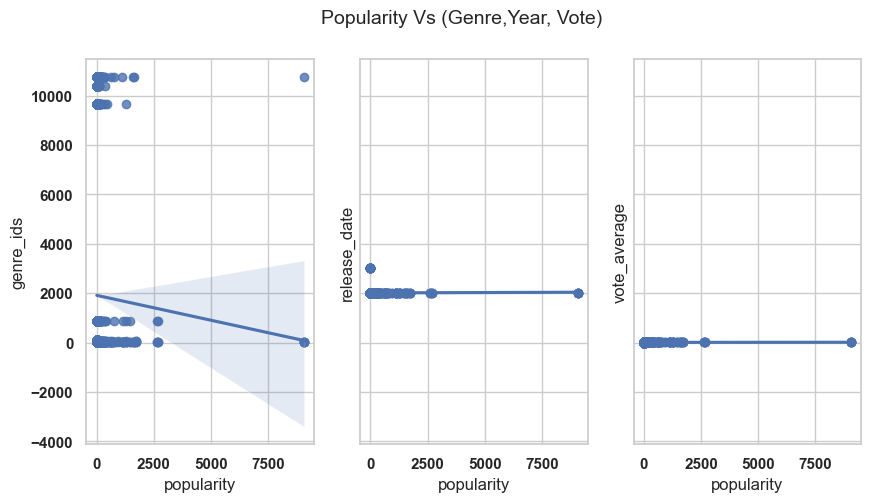

In [32]:
info = df2.explode('genre_ids')
info = info.dropna(subset=['popularity','genre_ids','release_date','vote_average'])
info = info.drop(['original_language','title','video','adult'],axis=1)
info = info.astype(int)

fig, (ax1, ax2, ax3)  = plt.subplots(ncols=3, sharey=True)
fig.suptitle("Popularity Vs (Genre,Year, Vote)",fontsize=14)

sns.regplot(x=info['popularity'], y=info['genre_ids'], data = info, ax=ax1)
sns.regplot(x=info['popularity'], y=info['release_date'], ax=ax2)
sns.regplot(x=info['popularity'], y=info['vote_average'], ax=ax3)

sns.set_style("whitegrid")

In [33]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 6 , 4 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

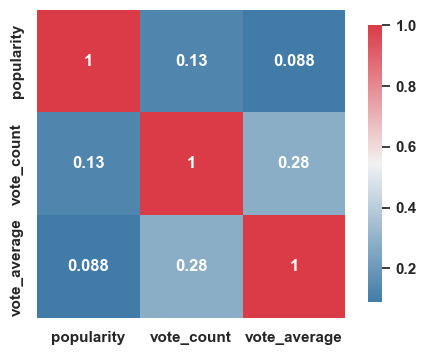

In [34]:
plot_correlation_map(df2[['popularity','vote_count','vote_average']])